# DATA CLEANING

# Carga de datos a través de la función read_csv

El codigo a continuación presenta el dataset de pasajeros del titanic, se van a cargar los datos, realizar algunos analisis preliminares y limpiar las columnas que presentan datos faltantes.

In [1]:
import pandas as pd
import os

mainpath = "/Users/andrescarvajal/Desktop/Portfolio/dataCleaning/"
filename = "titanic/titanic3.csv"
fullpath = os.path.join(mainpath, filename)

data = pd.read_csv(fullpath)

data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [2]:
data.tail(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
data.shape

(1309, 14)

In [4]:
data.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [5]:
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

**Missing values

In [7]:
pd.isnull(data["body"])

0        True
1        True
2        True
3       False
4        True
        ...  
1304    False
1305     True
1306    False
1307     True
1308     True
Name: body, Length: 1309, dtype: bool

In [8]:
pd.notnull(data["body"])

0       False
1       False
2       False
3        True
4       False
        ...  
1304     True
1305    False
1306     True
1307    False
1308    False
Name: body, Length: 1309, dtype: bool

In [9]:
pd.isnull(data["body"]).values.ravel().sum()

1188

In [10]:
pd.notnull(data["body"]).values.ravel().sum()

121

## Los valores que faltan en un data set pueden venir por dos razones:

* Extracción de los datos
* Recolección de los datos

### Borrado de valores que faltan

In [11]:
data.dropna(axis=0, how="all")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [12]:
data2 = data

In [13]:
data2.dropna(axis=0, how="any")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


## Cómputo de los valores fantantes

In [14]:
data3 = data

In [15]:
data3.fillna(0)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,0,C,0,328.0,0
1305,3,0,"Zabour, Miss. Thamine",female,0.0000,1,0,2665,14.4542,0,C,0,0.0,0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,0,C,0,304.0,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,0,C,0,0.0,0


In [17]:
data4 = data
data4= data4.fillna("Desconocido")

In [18]:
data5 = data

In [19]:
data5["body"] = data5["body"].fillna(0)
data5["home.dest"] = data5["home.dest"].fillna("Desconocido")
data5.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"


In [20]:
pd.isnull(data5["age"]).values.ravel().sum()

263

In [21]:
data5["age"].fillna(data["age"].mean())

0       29.000000
1        0.916700
2        2.000000
3       30.000000
4       25.000000
          ...    
1304    14.500000
1305    29.881135
1306    26.500000
1307    27.000000
1308    29.000000
Name: age, Length: 1309, dtype: float64

In [22]:
data5["age"].fillna(method="ffill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [23]:
data5["age"].fillna(method="backfill")

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    26.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [32]:
data5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,0.0,Desconocido


**Variables dummy

In [24]:
data["sex"].head(10)

0    female
1      male
2    female
3      male
4    female
5      male
6    female
7      male
8    female
9      male
Name: sex, dtype: object

In [25]:
dummy_sex = pd.get_dummies(data["sex"], prefix="sex")

In [26]:
dummy_sex.head(10)

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [27]:
column_name=data.columns.values.tolist()
column_name

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [28]:
data = data.drop(["sex"], axis = 1)

In [29]:
data = pd.concat([data, dummy_sex], axis = 1)

In [30]:
def createDummies(df, var_name):
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df

In [31]:
createDummies(data3, "sex")

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,0.0,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,Desconocido,1,0
1305,3,0,"Zabour, Miss. Thamine",NaN,1,0,2665,14.4542,NaN,C,NaN,0.0,Desconocido,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,Desconocido,0,1
1307,3,0,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,NaN,C,NaN,0.0,Desconocido,0,1


# Visualización de Datos

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt", sep=",")
data3 = data2

In [41]:
data2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [42]:
data2.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

In [43]:
data_cols = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Columns.csv")
data_col_list = data_cols["Column_Names"].tolist()
data2 = pd.read_csv(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt", header = None, names = data_col_list)
data2.columns.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U'], dtype=object)

In [44]:
%matplotlib inline 

## Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

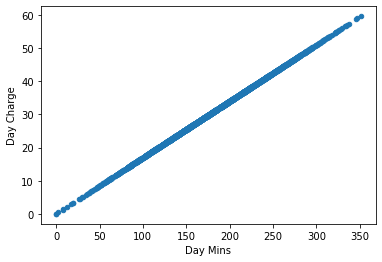

In [45]:
data3.plot(kind="scatter", x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

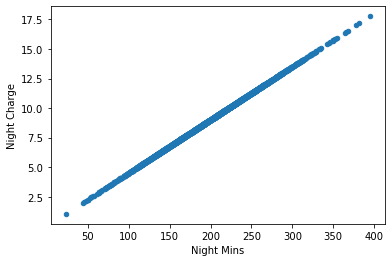

In [46]:
data3.plot(kind="scatter", x="Night Mins", y="Night Charge")

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

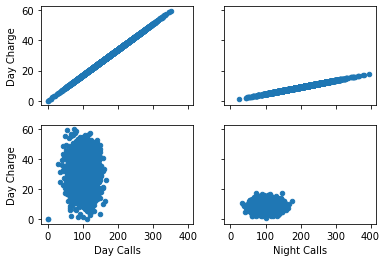

In [47]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data3.plot(kind="scatter", x="Day Mins", y ="Day Charge", ax=axs[0][0])
data3.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data3.plot(kind="scatter", x="Day Calls", y ="Day Charge", ax=axs[1][0])
data3.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

## Histogramas de frecuencias

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

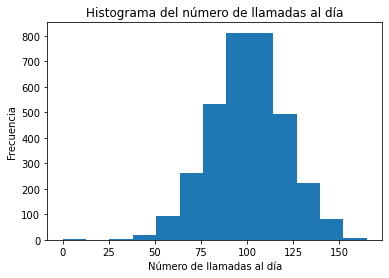

In [49]:
k = int(np.ceil(1+np.log2(3333)))
plt.hist(data3["Day Calls"], bins = k) #bins = [0,30,60,...,200]
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

## Boxplot, diagrama de caja y bigotes

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

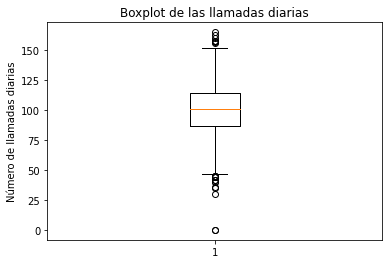

In [50]:
plt.boxplot(data3["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [51]:
data3["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [52]:
IQR=data3["Day Calls"].quantile(0.75)-data3["Day Calls"].quantile(0.25)
IQR

27.0

In [53]:
data3["Day Calls"].quantile(0.25) - 1.5*IQR

46.5

In [54]:
data3["Day Calls"].quantile(0.75) + 1.5*IQR

154.5

# Carga de datos a través de la función open

In [55]:
data3 = open(mainpath + "/" + "customer-churn-model/Customer Churn Model.txt",'r')

In [56]:
cols = data3.readline().strip().split(",")
n_cols = len(cols)

In [57]:
counter = 0
main_dict = {}
for col in cols:
    main_dict[col] = []

In [58]:
for line in data3:
    values = line.strip().split(",")
    for i in range(len(cols)):
        main_dict[cols[i]].append(values[i])
    counter += 1

print("El data set tiene %d filas y %d columnas"%(counter-1, n_cols))

El data set tiene 3332 filas y 21 columnas


In [59]:
df3 = pd.DataFrame(main_dict)
df3.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.100000,110,45.070000,...,99,16.780000,244.700000,91,11.010000,10.000000,3,2.700000,1,False.
1,OH,107,415,371-7191,no,yes,26,161.600000,123,27.470000,...,103,16.620000,254.400000,103,11.450000,13.700000,3,3.700000,1,False.
2,NJ,137,415,358-1921,no,no,0,243.400000,114,41.380000,...,110,10.300000,162.600000,104,7.320000,12.200000,5,3.290000,0,False.
3,OH,84,408,375-9999,yes,no,0,299.400000,71,50.900000,...,88,5.260000,196.900000,89,8.860000,6.600000,7,1.780000,2,False.
4,OK,75,415,330-6626,yes,no,0,166.700000,113,28.340000,...,122,12.610000,186.900000,121,8.410000,10.100000,3,2.730000,3,False.


# Lectura y escritura de ficheros

El siguiente codigo lee un archivo .dbf, realiza la limpieza de los datos y luego los escribe en un archivo nuevo .csv 

In [70]:
from dbfread import DBF


table = DBF(mainpath + '/' + '/Bolivia/Puntos.dbf', load=True)
frame = pd.DataFrame(iter(table))

#Checking type of missing values for x column
x = [x for x in frame.iloc[:]['X'] if np.isnan(x)]
print(np.isnan(x).any())

#Checking type of missing values for y column
y = [x for x in frame.iloc[:]['Y'] if np.isnan(x)]
print(np.isnan(x).any())

True
True


In [71]:
#writting new .csv file
outfile = open("Puntos_modificado.csv", "w")
# output the header row
outfile.write('OBJECTID,X,Y,Profondeur,Z_Tertiary,ProfTertia')
outfile.write('\n')
# output each of the rows:
row_string = str()
for i in range(len(frame)):
    if frame.iloc[i]['X'] == 0 and frame.iloc[i]['Y'] == 0 or np.isnan(frame.iloc[i]['X']) or np.isnan(frame.iloc[i]['Y']):
        continue
    else:
        row_string = '{},{},{},{},{},{}'.format(frame.iloc[i]['OBJECTID'],frame.iloc[i]['X'],frame.iloc[i]['Y'],frame.iloc[i]['Profondeur'],frame.iloc[i]['Z_Tertiary'],frame.iloc[i]['ProfTertia'])
    outfile.write(row_string)
    outfile.write('\n')
outfile.close()

#print dataframe
frame

,OBJECTID,X,Y,Profondeur,Z_Tertiary,ProfTertia
0,1,562298.2627,8.208205e+06,160,0.0,160.0
1,2,561682.8387,8.206737e+06,160,0.0,160.0
2,3,563387.0899,8.207211e+06,160,0.0,160.0
3,4,561919.5402,8.205601e+06,160,0.0,160.0
4,5,562156.2418,8.204560e+06,160,0.0,160.0
...,...,...,...,...,...,...
46544,49802,0.0000,0.000000e+00,0,0.0,45.0
46545,49803,0.0000,0.000000e+00,0,0.0,45.0
46546,49804,0.0000,0.000000e+00,0,0.0,45.0
46547,49805,0.0000,0.000000e+00,0,0.0,45.0


In [72]:
#printing filtered csv
csv_file = pd.read_csv('Puntos_modificado.csv')
csv_file

,OBJECTID,X,Y,Profondeur,Z_Tertiary,ProfTertia
0,1.0,562298.2627,8.208205e+06,160.0,0.0,160.0
1,2.0,561682.8387,8.206737e+06,160.0,0.0,160.0
2,3.0,563387.0899,8.207211e+06,160.0,0.0,160.0
3,4.0,561919.5402,8.205601e+06,160.0,0.0,160.0
4,5.0,562156.2418,8.204560e+06,160.0,0.0,160.0
...,...,...,...,...,...,...
46517,49781.0,544910.3219,8.174247e+06,0.0,0.0,50.0
46518,49782.0,545062.7222,8.174343e+06,0.0,0.0,75.0
46519,49783.0,545202.4225,8.174438e+06,0.0,0.0,100.0
46520,49784.0,545323.0728,8.174501e+06,0.0,0.0,125.0


# Leer datos desde una URL

In [73]:
medals_url = "http://winterolympicsmedals.com/medals.csv"

In [74]:
medals_data = pd.read_csv(medals_url)

In [75]:
medals_data.head()

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


# Descarga de datos con urllib3

Vamos a hacer un ejemplo usando la librería urllib3 para leer los datos desde una URL externa, procesarlos y convertirlos a un data frame de python antes de guardarlos en un CSV local.

In [78]:
def downloadFromURL(url, filename, sep = ",", delim = "\n", encoding="utf-8", 
                   mainpath = "Users/andrescarvajal/Desktop/Portfolio/dataCleaning/"):
    #primero importamos la librería y hacemos la conexión con la web de los datos
    import urllib3
    http = urllib3.PoolManager()
    r = http.request('GET', url)
    print("El estado de la respuesta es %d" %(r.status))
    response = r.data 
    
    #El objeto reponse contiene un string binario, así que lo convertimos a un string descodificándolo en UTF-8
    str_data = response.decode(encoding)

    #Dividimos el string en un array de filas, separándolo por intros
    lines = str_data.split(delim)

    #La primera línea contiene la cabecera, así que la extraemos
    col_names = lines[0].split(sep)
    n_cols = len(col_names)

    #Generamos un diccionario vacío donde irá la información procesada desde la URL externa
    counter = 0
    main_dict = {}
    for col in col_names:
        main_dict[col] = []

    #Procesamos fila a fila la información para ir rellenando el diccionario con los datos como hicimos antes
    for line in lines:
        #Nos saltamos la primera línea que es la que contiene la cabecera y ya tenemos procesada
        if(counter > 0):
            #Dividimos cada string por las comas como elemento separador
            values = line.strip().split(sep)
            #Añadimos cada valor a su respectiva columna del diccionario
            for i in range(len(col_names)):
                main_dict[col_names[i]].append(values[i])
        counter += 1

    print("El data set tiene %d filas y %d columnas"%(counter-1, n_cols))

    #Convertimos el diccionario procesado a Data Frame y comprobamos que los datos son correctos
    df = pd.DataFrame(main_dict)    
    return df

In [79]:
medals_df = downloadFromURL(medals_url, "athletes/downloaded_medals")
medals_df.head()

El estado de la respuesta es 200
El data set tiene 2311 filas y 8 columnas


,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
